In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings
import re

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')

In [4]:
#ÏΩîÎû© ÏΩîÎìú
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,930 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and dire

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Ïú†ÎãàÏΩîÎìú Íπ®ÏßêÌòÑÏÉÅ Ìï¥Í≤∞
mpl.rcParams['axes.unicode_minus'] = False

# ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ Ï†ÅÏö©
plt.rcParams["font.family"] = 'NanumGothic'

In [6]:
# Ïã§ÌñâÍ≤∞Í≥º Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÏô∏
import warnings
import platform
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [7]:
df_raw = pd.read_csv("/content/drive/MyDrive/·Ñë·Ö©·Ñâ·Ö≥·Ñè·Ö© ·Ñá·Öµ·Ü®·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñã·Ö°·Ñè·Ö°·ÑÉ·Ö¶·ÑÜ·Öµ/·Ñá·Öµ·Ü®·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·Ñå·ÖÆ·Üº·ÑÄ·Ö©·Ñé·Ö° ·ÑÄ·Ö°·ÑÄ·Öß·Ü® ·Ñã·Ö®·Ñé·Ö≥·Ü® ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/Car.csv", encoding = 'euc-kr')
df_raw.head()

# df_raw Ï¥ù 13Í∞ú Ïó¥, 7253 Ìñâ Îç∞Ïù¥ÌÑ∞

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First   26.6 kmpl   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  
0  58.16 bhp    5.0        NaN  
1  126.2 bhp    5.0        NaN  
2   88.7 bhp    5.0  8.61 Lakh  
3  88.76 bhp    7.0        NaN  
4  140.8 bhp    5.0        NaN

In [8]:
#Îç∞Ïù¥ÌÑ∞ Ïó¥ Ï†ïÎ≥¥ ÌôïÏù∏
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [9]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [10]:
# Ïà´ÏûêÌòï Î≥ÄÏàòÎì§ ÏöîÏïΩÌÜµÍ≥ÑÎüâ
df_raw.describe()

Price         Year  Kilometers_Driven        Seats
count    6200.000000  7253.000000       7.253000e+03  7200.000000
mean    14912.514750  2013.365366       5.869906e+04     5.279722
std     17674.318464     3.254421       8.442772e+04     0.811660
min         7.080000  1996.000000       1.710000e+02     0.000000
25%      5365.360000  2011.000000       3.400000e+04     5.000000
50%      8814.520000  2014.000000       5.341600e+04     5.000000
75%     15869.972500  2016.000000       7.300000e+04     5.000000
max    245273.600000  2019.000000       6.500000e+06    10.000000

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Îã®ÏúÑ Ï†úÍ±∞

In [11]:
# Îí§Ïóê Î∂ôÏùÄ Îã®ÏúÑ Ï†úÍ±∞
df_raw['Mileage'] = df_raw['Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_raw['Engine'] = df_raw['Engine'].str.extract(r'(\d+)').astype(float)  # Ï†ïÏàòÏßÄÎßå float Ï≤òÎ¶¨
df_raw['Power'] = df_raw['Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_raw.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_Price  
0   58.16    5.0        NaN  
1  126.20    5.0        NaN  
2   88.70    5.0  8.61 Lakh  
3   88.76    7.0        NaN  
4  140.80    5.0        NaN

In [12]:
df_raw['Fuel_Type'].value_counts() # Ï†ÑÍ∏∞Ï∞®Í∞Ä 2Í∞úÎßå Ï°¥Ïû¨
# Îã§ÌñâÌûà test dataÏóê electricÏù¥ ÏóÜÏùå -> Î≤ÑÎ¶¥ ÏòàÏ†ï

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


# Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨

- New_Price Ïó¥ Ï†úÍ±∞

In [14]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df = df_raw.drop(columns = ['New_Price'], axis = 1)
# New_PriceÏùò Í≤∞Ï∏°Í∞íÏù¥ ÎÑàÎ¨¥ ÎßéÏù¥ Î∞úÍ≤¨ÎêòÏñ¥, New_Price Ïó¥ÏùÑ ÏÇ≠Ï†úÌïòÍ∏∞Î°ú Í≤∞Ï†ï
df.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  
0   58.16    5.0  
1  126.20    5.0  
2   88.70    5.0  
3   88.76    7.0  
4  140.80    5.0

- "Price" Ïó¥ Ï†úÍ±∞(Test dataÎ°ú Ïì∞Ïùº ÏòàÏ†ï)

In [15]:
#PriceÏùò Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú (Î™©ÌëúÎ≥ÄÏàò) -> ÎÇòÏ§ëÏóê test dataÎ°ú ÏÇ¨Ïö©
df.dropna(subset = ['Price'], inplace = True)

- "Mileage"Ïó¥ Ï†úÍ±∞

In [16]:
# Ïó∞ÎπÑÍ∞Ä NanÏù∏ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# Ï†ÑÍ∏∞Ï∞®Îäî Ïó∞ÎπÑÎùºÎäî Í≤å ÏóÜÏùå. Îã§ÌñâÌûà test dataÏóê ElectricÏù¥ ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df[df['Mileage'].isnull() == True]

Name Location     Price  Year  Kilometers_Driven  \
4446       Mahindra E Verito D4  Chennai  19928.48  2016              50000   
4904  Toyota Prius 2009-2016 Z4   Mumbai  19545.24  2011              44000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  
4446  Electric    Automatic      First      NaN    72.0   41.0    5.0  
4904  Electric    Automatic      First      NaN  1798.0   73.0    5.0

In [17]:
# Mileage Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df.dropna(subset = ['Mileage'], inplace = True)

In [18]:
df.info()

# Mileage Í≤∞Ï∏°Í∞í Ï†úÍ±∞ ÏôÑÎ£å
# Engine Í≤∞Ï∏°Í∞í 36Í∞ú
# Power Í≤∞Ï∏°Í∞í 143Í∞ú
# Seats Í≤∞Ï∏°Í∞í 42Í∞ú

<class 'pandas.core.frame.DataFrame'>
Index: 6198 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6198 non-null   object 
 1   Location           6198 non-null   object 
 2   Price              6198 non-null   float64
 3   Year               6198 non-null   int64  
 4   Kilometers_Driven  6198 non-null   int64  
 5   Fuel_Type          6198 non-null   object 
 6   Transmission       6198 non-null   object 
 7   Owner_Type         6198 non-null   object 
 8   Mileage            6198 non-null   float64
 9   Engine             6162 non-null   float64
 10  Power              6055 non-null   float64
 11  Seats              6156 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 629.5+ KB


- Mileage Í∞íÏù¥ 0Ïù∏ Ìñâ Ï°¥Ïû¨ 58Í∞ú-> Ïù¥ÏÉÅÏπòÏùò ÏòÅÌñ•ÏùÑ Îçú Î∞õÎäî Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥

In [19]:
df[df['Mileage']==0].count()

Name                 68
Location             68
Price                68
Year                 68
Kilometers_Driven    68
Fuel_Type            68
Transmission         68
Owner_Type           68
Mileage              68
Engine               57
Power                29
Seats                56
dtype: int64

In [20]:
# Mileage Í∞íÏù¥ 0Ïù∏ Í≤ΩÏö∞ ÌôïÏù∏
mileage_zero_count = (df['Mileage'] == 0).sum()

# MileageÏùò Ï§ëÏïôÍ∞í Í≥ÑÏÇ∞ (0Ïù¥ ÏïÑÎãå Í∞íÎì§Îßå Í≥†Î†§)
mileage_median = df[df['Mileage'] > 0]['Mileage'].median()

# Mileage Í∞íÏù¥ 0Ïù∏ ÌñâÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df.loc[df['Mileage'] == 0, 'Mileage'] = mileage_median

# ÎåÄÏ≤¥Îêú Í∞í ÌôïÏù∏
mileage_zero_after = (df['Mileage'] == 0).sum()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÎåÄÏ≤¥ Ï†Ñ Mileage Í∞íÏù¥ 0Ïù∏ Ìñâ Í∞úÏàò: {mileage_zero_count}")
print(f"ÎåÄÏ≤¥ ÌõÑ Mileage Í∞íÏù¥ 0Ïù∏ Ìñâ Í∞úÏàò: {mileage_zero_after}")
print(f"ÎåÄÏ≤¥Îêú Mileage Ï§ëÏïôÍ∞í: {mileage_median}")

ÎåÄÏ≤¥ Ï†Ñ Mileage Í∞íÏù¥ 0Ïù∏ Ìñâ Í∞úÏàò: 68
ÎåÄÏ≤¥ ÌõÑ Mileage Í∞íÏù¥ 0Ïù∏ Ìñâ Í∞úÏàò: 0
ÎåÄÏ≤¥Îêú Mileage Ï§ëÏïôÍ∞í: 18.3


- "Engine" Ïó¥

In [21]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∞±ÏóÖ
df_before = df.copy()

# Í∞Å Í∑∏Î£πÎ≥Ñ Í≥†Ïú†Ìïú Engine Í∞í Í∞úÏàò ÌôïÏù∏
engine_counts = df.groupby(['Name', 'Fuel_Type', 'Year'])['Engine'].nunique()

# Í≥†Ïú†Ìïú Engine Í∞íÏù¥ Îî± ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÎäî Í∑∏Î£πÏùÑ ÌïÑÌÑ∞ÎßÅ
valid_groups = engine_counts[engine_counts == 1].index

# Engine Í∞íÏù¥ NaNÏù∏ Í≤ΩÏö∞, Í∞ôÏùÄ Name, Fuel_Type, Year Í∑∏Î£πÏóêÏÑú Ïú†ÏùºÌïú Í∞íÏùÑ ÎåÄÏ≤¥ÌïòÎäî Ìï®Ïàò
def fill_unique_engine(row):
    if pd.isna(row['Engine']):  # Engine Í∞íÏù¥ NaNÏù∏ Í≤ΩÏö∞
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # Ìï¥Îãπ Í∑∏Î£πÏù¥ Ïú†ÏùºÌïú Engine Í∞íÏùÑ Í∞ÄÏßà ÎïåÎßå ÎåÄÏ≤¥
            return df.loc[(df['Name'] == row['Name']) &
                          (df['Fuel_Type'] == row['Fuel_Type']) &
                          (df['Year'] == row['Year']), 'Engine'].dropna().iloc[0]
    return row['Engine']  # Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏúºÎ©¥ ÏõêÎûò Í∞í Ïú†ÏßÄ

# Engine Í∞í Ï±ÑÏö∞Í∏∞ Ï†ÅÏö©
df['Engine'] = df.apply(fill_unique_engine, axis=1)

# ÎåÄÏ≤¥Îêú Engine Í∞í Ï∞æÍ∏∞ (ÏõêÎ≥∏ÏùÄ NaN, ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Í∞íÏù¥ ÏûàÎäî Í≤ΩÏö∞)
filled_engine = df[(df['Engine'].notnull()) & (df_before['Engine'].isnull())].copy()

# Ïñ¥Îñ§ Ïó¥ÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú Ï±ÑÏõ†ÎäîÏßÄ ÌôïÏù∏ (Í∞ôÏùÄ Name, Fuel_Type, YearÏóêÏÑú Í∞ÄÏ†∏Ïò¥)
filled_engine['Reference_Values'] = filled_engine.apply(
    lambda row: df_before.loc[
        (df_before['Name'] == row['Name']) &
        (df_before['Fuel_Type'] == row['Fuel_Type']) &
        (df_before['Year'] == row['Year']), 'Engine'
    ].dropna().unique(), axis=1
)

# Í≤∞Í≥º Ï∂úÎ†•
if not filled_engine.empty:
    print("ÏÉàÎ°≠Í≤å Ï±ÑÏõåÏßÑ Engine Í∞íÏù¥ ÏûàÎäî ÌñâÎì§:")
    print(filled_engine[['Name', 'Fuel_Type', 'Year', 'Engine', 'Reference_Values']].head(10))  # Ï≤òÏùå 10Í∞úÎßå Ï∂úÎ†•
else:
    print("ÎåÄÏ≤¥Îêú Engine Í∞íÏù¥ ÏóÜÏäµÎãàÎã§.")

ÏÉàÎ°≠Í≤å Ï±ÑÏõåÏßÑ Engine Í∞íÏù¥ ÏûàÎäî ÌñâÎì§:
                   Name Fuel_Type  Year  Engine Reference_Values
194  Honda City 1.5 GXI    Petrol  2007  1493.0         [1493.0]


In [22]:
df.isnull().sum()
# Engine Í≤∞Ï∏°Í∞í ÌïòÎÇò Ï±ÑÏõåÏßê

Name                   0
Location               0
Price                  0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                35
Power                143
Seats                 42
dtype: int64

In [23]:
# Engine Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df.dropna(subset = ['Engine'], inplace = True)

In [24]:
df.isnull().sum()

Name                   0
Location               0
Price                  0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                108
Seats                  7
dtype: int64

- "Power" ÌöåÍ∑ÄÎ°ú Í∞í ÎåÄÏ≤¥

In [25]:
# EngineÍ≥º PowerÏùÄ ÏÇ∞Ï†êÎèÑ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ÏÑú Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùåÏúºÎ°ú ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ EngineÏùò Í≤ΩÌñ•ÏùÑ ÌÜ†ÎåÄÎ°ú PowerÏùÑ ÏòàÏ∏°Ìï¥ Í≤∞Ï∏°ÏπòÎ•º ÎÑ£Ïñ¥Ï§å
train_df = df.dropna()
test_df = df[df['Power'].isnull()]
X_train = train_df[['Engine']]
y_train = train_df['Power']
model = LinearRegression()
model.fit(X_train, y_train)
X_test = test_df[['Engine']]
y_pred = model.predict(X_test)
df.loc[df['Power'].isnull(), 'Power'] = y_pred
df.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  
0   58.16    5.0  
1  126.20    5.0  
2   88.70    5.0  
3   88.76    7.0  
4  140.80    5.0

In [26]:
df.isnull().sum()

# power Í≤∞Ï∏°Í∞í Îã§ ÎåÄÏ≤¥Îê®

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                7
dtype: int64

- "Seats" ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥

In [27]:
mode_seats = df['Seats'].mode()[0] # ÏµúÎπàÍ∞í Ï§ë Ï≤´Î≤àÏß∏ Í∞í Í∞ÄÏ†∏Ïò¥ (ÏµúÎπàÍ∞í 5Î°ú ÎåÄÏ≤¥)
df['Seats'].fillna(mode_seats, inplace=True)
df.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  
0   58.16    5.0  
1  126.20    5.0  
2   88.70    5.0  
3   88.76    7.0  
4  140.80    5.0

In [28]:
df.isnull().sum()

# Í≤∞Ï∏°Í∞í Î™®Îëê Ìï¥Í≤∞ ÏôÑÎ£å

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [29]:
df[df['Seats']==0] # Seats ÏàòÍ∞Ä 0Í∞úÏù∏ Îç∞Ïù¥ÌÑ∞ 1Í∞ú Ï°¥Ïû¨

Name   Location     Price  Year  \
3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  27593.28  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
3999             125000    Petrol    Automatic      First     10.5  3197.0   

           Power  Seats  
3999  235.885794    0.0

In [30]:
df = df[df['Seats'] != 0]

In [31]:
df

Name    Location     Price  Year  \
0                 Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1       Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                           Honda Jazz V     Chennai   6898.32  2011   
3                      Maruti Ertiga VDI     Chennai   9197.76  2012   
4        Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   
...                                  ...         ...       ...   ...   
7228  Tata Tiago 1.05 Revotorq XT Option        Pune  10822.70  2016   
7231   Ford EcoSport 1.5 Petrol Ambiente       Kochi  13474.72  2017   
7232              Jeep Compass 1.4 Sport      Mumbai  27838.55  2018   
7235            Maruti Vitara Brezza ZDi       Kochi  16203.39  2017   
7236        Hyundai Elite i20 Magna Plus       Kochi      7.08  2018   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 72000       CNG       Manual      First    26.60   998.0   
1                 41000    Diesel       Manual      First    19.67  1582.0   
2                 46000    Petrol       Manual      First    18.20  1199.0   
3                 87000    Diesel       Manual      First    20.77  1248.0   
4                 40670    Diesel    Automatic     Second    15.20  1968.0   
...                 ...       ...          ...        ...      ...     ...   
7228              41413    Diesel       Manual      First    27.28  1047.0   
7231              39015    Petrol       Manual      First    17.00  1497.0   
7232               6000    Petrol       Manual      First    16.00  1368.0   
7235              21380    Diesel       Manual      First    24.30  1248.0   
7236              23955    Petrol       Manual      First    18.60  1197.0   

       Power  Seats  
0      58.16    5.0  
1     126.20    5.0  
2      88.70    5.0  
3      88.76    7.0  
4     140.80    5.0  
...      ...    ...  
7228   69.00    5.0  
7231  121.36    5.0  
7232  160.00    5.0  
7235   88.50    5.0  
7236   81.86    5.0  

[6162 rows x 12 columns]

- df Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ(Ïó¥ 12Í∞ú, ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ 6162Í∞ú)

#ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

- Brand (Ï∞® Î∏åÎûúÎìú)

In [32]:
len(np.unique(list(df.Name))) # ÏûêÎèôÏ∞® Î™®Îç∏ Ï¢ÖÎ•ò Ï¥ù 1902Í∞ú

1902

In [33]:
df['Brand'] = df.Name.apply(lambda x:x.split()[0])
df.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats    Brand  
0   58.16    5.0   Maruti  
1  126.20    5.0  Hyundai  
2   88.70    5.0    Honda  
3   88.76    7.0   Maruti  
4  140.80    5.0     Audi

- car_age (Ïó∞Ïãù)

In [34]:
current_year = 2024
df['car_age'] = current_year - df['Year']
df.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats    Brand  car_age  
0   58.16    5.0   Maruti       14  
1  126.20    5.0  Hyundai        9  
2   88.70    5.0    Honda       13  
3   88.76    7.0   Maruti       12  
4  140.80    5.0     Audi       11

- yearly_mileage

In [35]:
# Ï£ºÌñâ Í±∞Î¶¨ ÎåÄÎπÑ Ïó∞Ïãù(Ïó∞ÌèâÍ∑† Ï£ºÌñâ Í±∞Î¶¨) Í≥ÑÏÇ∞
df['yearly_mileage'] = df['Mileage'] / df['car_age']
df.head()

Name    Location     Price  Year  \
0            Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                      Honda Jazz V     Chennai   6898.32  2011   
3                 Maruti Ertiga VDI     Chennai   9197.76  2012   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats    Brand  car_age  yearly_mileage  
0   58.16    5.0   Maruti       14        1.900000  
1  126.20    5.0  Hyundai        9        2.185556  
2   88.70    5.0    Honda       13        1.400000  
3   88.76    7.0   Maruti       12        1.730833  
4  140.80    5.0     Audi       11        1.381818

- Income Level

In [36]:
rich_areas = ["Mumbai", "Delhi", "Bangalore", "Pune", "Hyderabad"]
middle_areas = ["Chennai", "Kolkata", "Coimbatore", "Kochi"]
poor_areas = ["Ahmedabad", "Jaipur"]

def classify_income(location):
    if location in rich_areas:
        return "ÏÉÅ (Î∂ÄÏú†Ìïú)"
    elif location in middle_areas:
        return "Ï§ë (Ï§ëÏÇ∞Ï∏µ)"
    elif location in poor_areas:
        return "Ìïò (Ï†ÄÏÜåÎìù)"
    else:
        return "Í∏∞ÌÉÄ"

df["Income Level"] = df["Location"].apply(classify_income)
df.drop(["Location"],axis=1,inplace=True)
df.head()

Name     Price  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   2682.68  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option  19162.00  2015              41000   
2                      Honda Jazz V   6898.32  2011              46000   
3                 Maruti Ertiga VDI   9197.76  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  27194.71  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats    Brand  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   Maruti   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  Hyundai   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0    Honda   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   Maruti   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0     Audi   

   car_age  yearly_mileage Income Level  
0       14        1.900000      ÏÉÅ (Î∂ÄÏú†Ìïú)  
1        9        2.185556      ÏÉÅ (Î∂ÄÏú†Ìïú)  
2       13        1.400000      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
3       12        1.730833      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
4       11        1.381818      Ï§ë (Ï§ëÏÇ∞Ï∏µ)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6162 entries, 0 to 7236
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6162 non-null   object 
 1   Price              6162 non-null   float64
 2   Year               6162 non-null   int64  
 3   Kilometers_Driven  6162 non-null   int64  
 4   Fuel_Type          6162 non-null   object 
 5   Transmission       6162 non-null   object 
 6   Owner_Type         6162 non-null   object 
 7   Mileage            6162 non-null   float64
 8   Engine             6162 non-null   float64
 9   Power              6162 non-null   float64
 10  Seats              6162 non-null   float64
 11  Brand              6162 non-null   object 
 12  car_age            6162 non-null   int64  
 13  yearly_mileage     6162 non-null   float64
 14  Income Level       6162 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 770.2+ KB


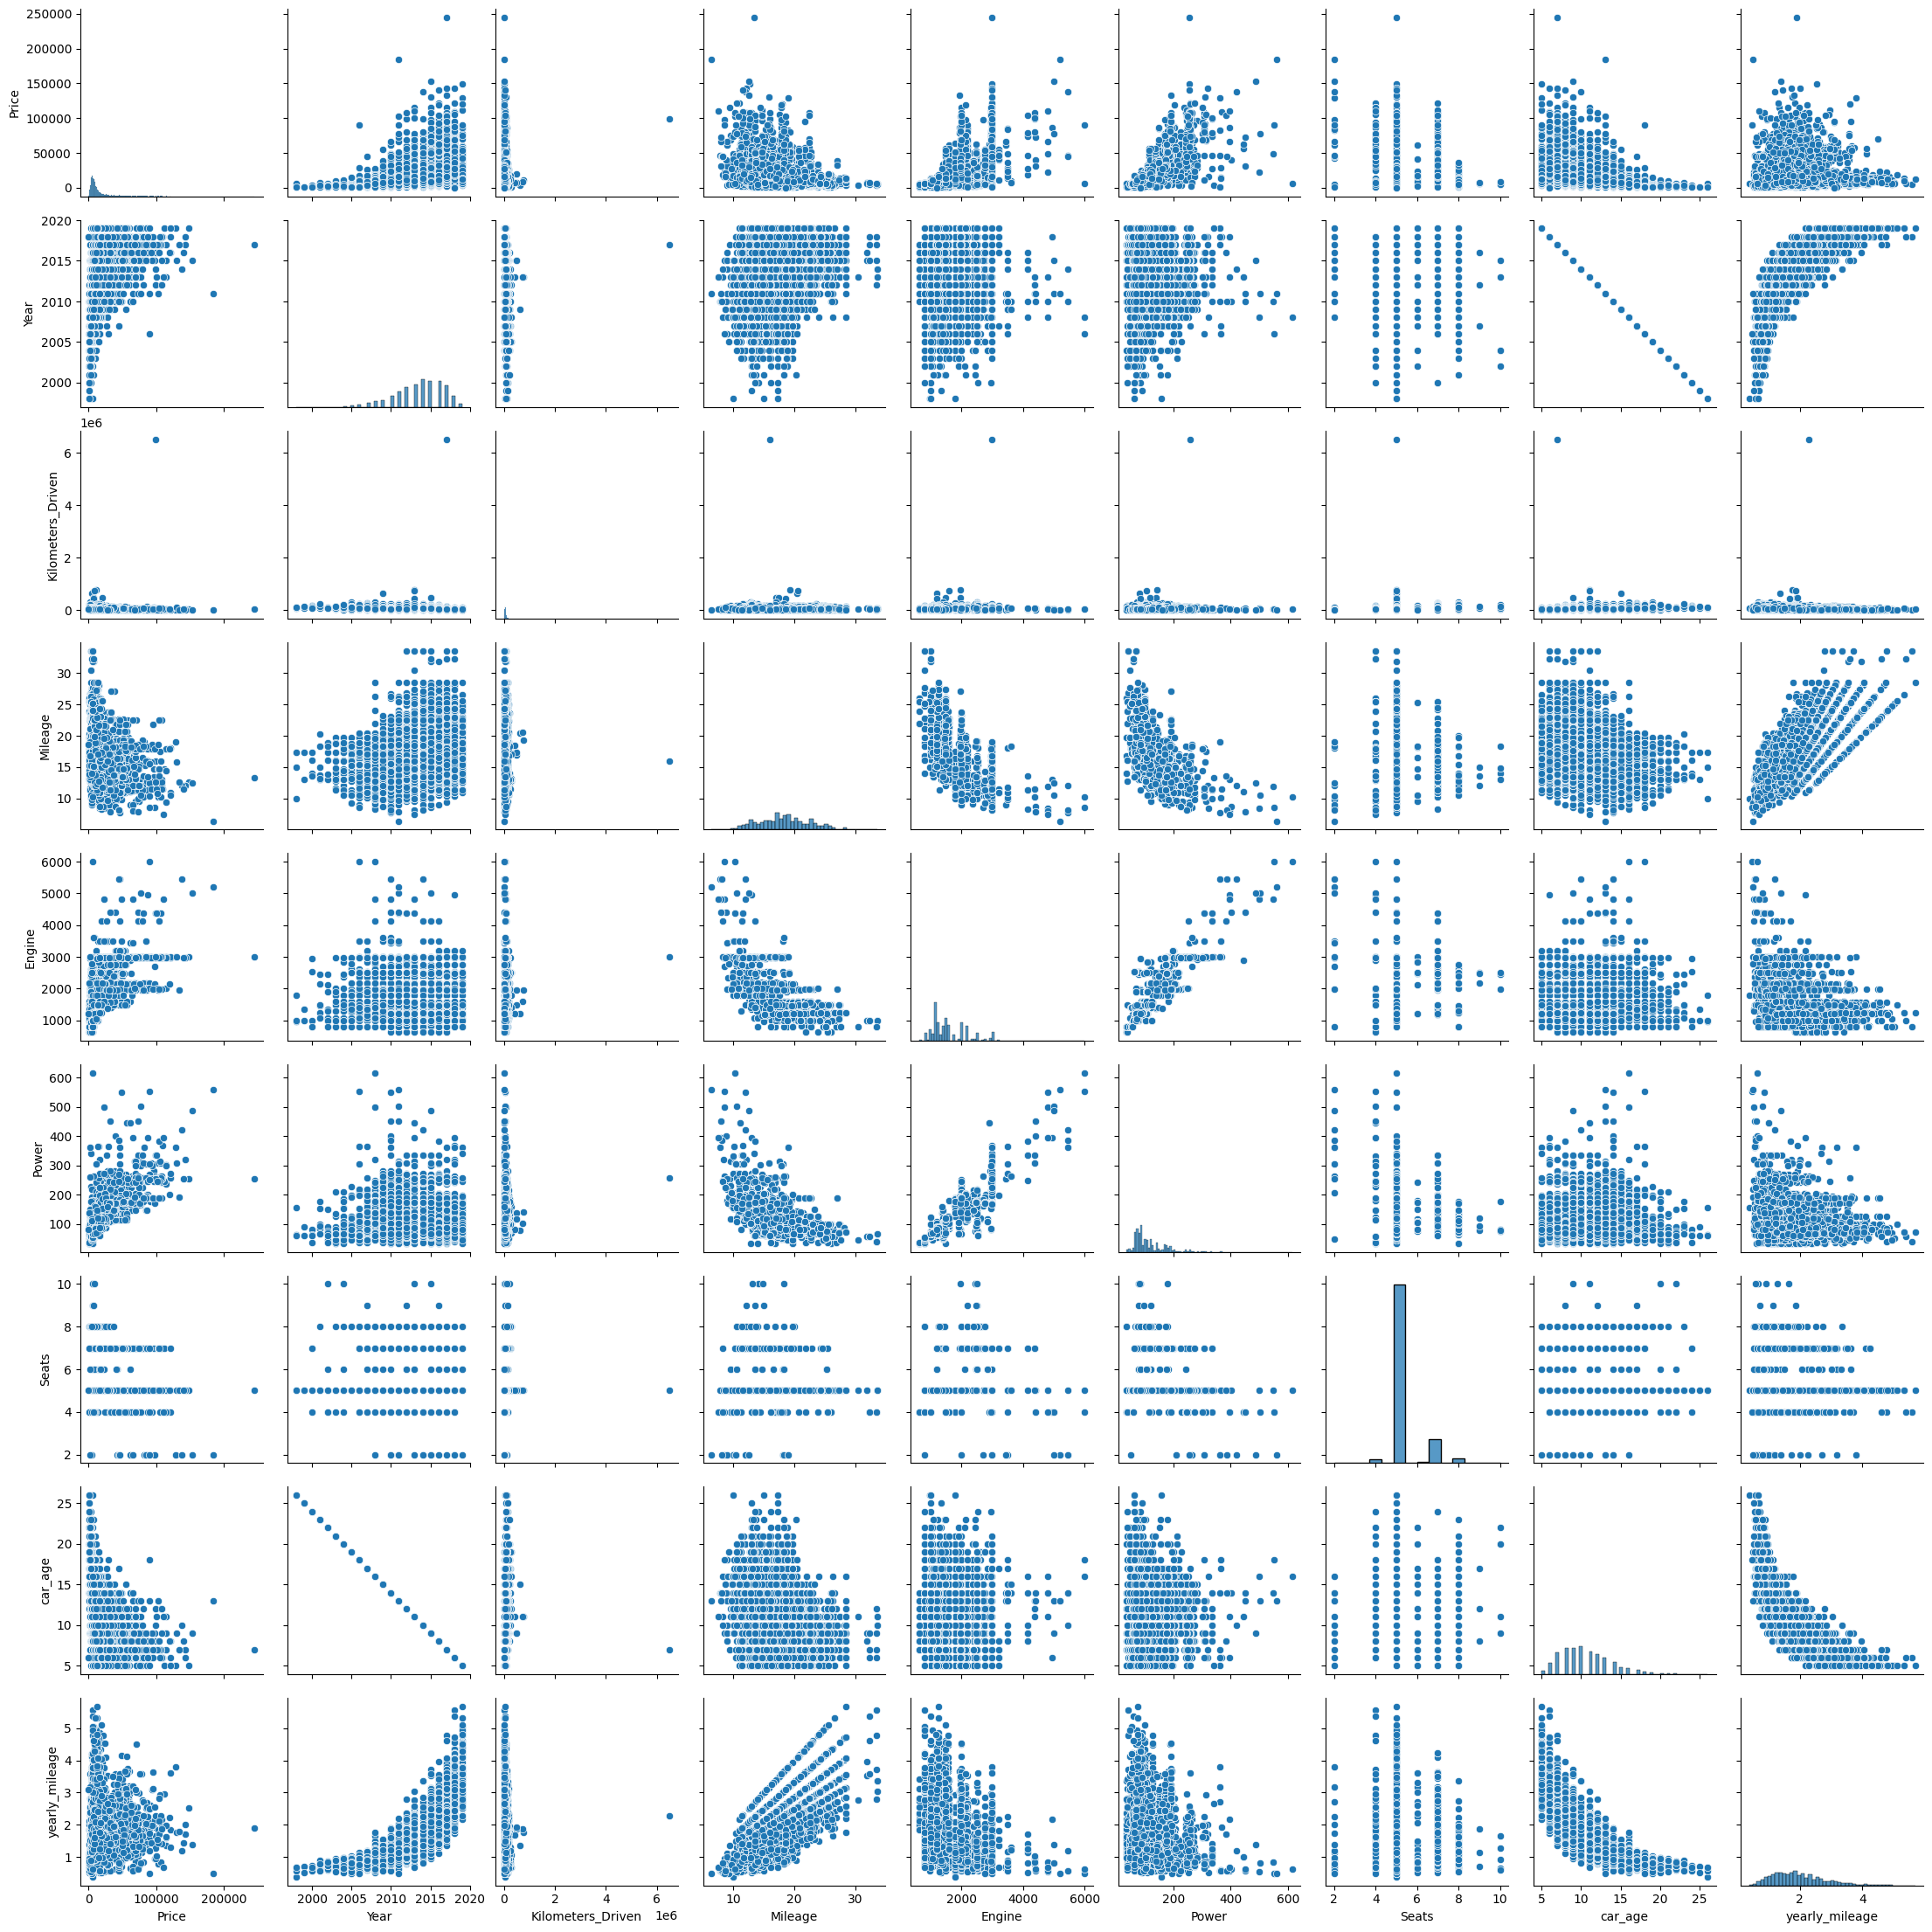

In [38]:
sns.pairplot(df)

#Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

<Axes: xlabel='Kilometers_Driven'>

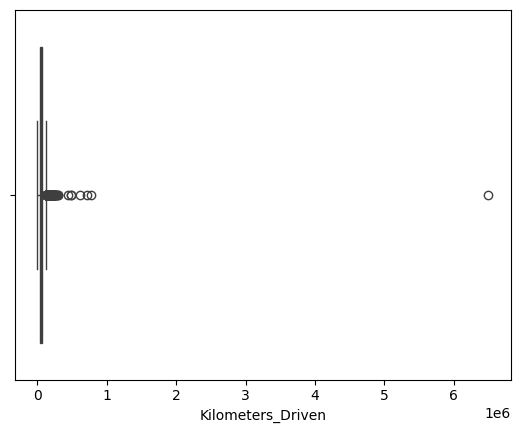

In [39]:
sns.boxplot(x = df['Kilometers_Driven'])

# kilometer_driven ÏµúÎåÄÍ∞íÏùÄ 6500000 ÏúºÎ°ú Îã§Î•∏ Ï∞®ÎüâÎ≥¥Îã§ Ìõ®Ïî¨ Îçî ÎßéÏù¥ Ïö¥ÌñâÎêòÏóàÏùåÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Ïù¥ Í∞íÏùÄ ÏïÑÎßàÎèÑ Ïù¥ÏÉÅÏπò Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏñ¥ boxplotÏúºÎ°ú ÌôïÏù∏

In [40]:
# kilometers Î≥ÄÏàò Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†Ñ = 6155Í∞ú
# 1.5 IQR Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ = 5948Í∞ú
# 3 IQR Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ = 6056Í∞ú
# 4 IQR Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ = 6077Í∞ú

In [41]:
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

# IQR Í∑úÏπôÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπòÎ•º ÌïÑÌÑ∞ÎßÅ
df = df[~((df['Kilometers_Driven'] < (Q1 - 4 * IQR)) | (df['Kilometers_Driven'] > (Q3 + 4 * IQR)))]

<Axes: xlabel='Kilometers_Driven'>

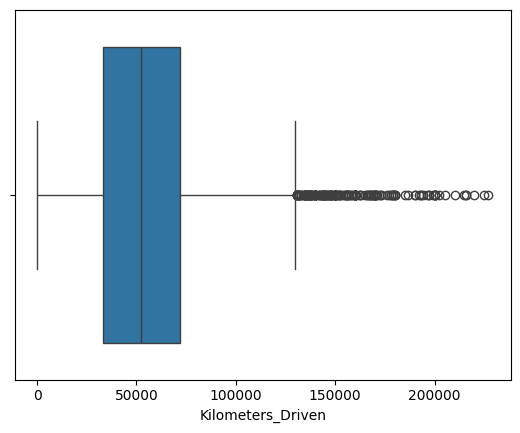

In [42]:
#Ïù¥ÏÉÅÏπò ÌïÑÌÑ∞ÎßÅ ÌõÑ Îã§Ïãú boxplot ÌôïÏù∏
sns.boxplot(x = df['Kilometers_Driven'])

In [43]:
df_sorted = df.sort_values(by='Price', ascending=True)
df_sorted.head()

# PriceÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÏùÄ Ï∞®Í∞Ä Ï°¥Ïû¨

Name   Price  Year  Kilometers_Driven Fuel_Type  \
7236  Hyundai Elite i20 Magna Plus    7.08  2018              23955    Petrol   
1713                  Tata Nano Lx  674.50  2011              65000    Petrol   
3138                Maruti Zen LXI  689.83  1998              95150    Petrol   
1628          Maruti 800 Std BSIII  689.83  2004              12000    Petrol   
2847              Hyundai Getz GLS  689.83  2005              86000    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats    Brand  car_age  \
7236       Manual      First     18.6  1197.0  81.86    5.0  Hyundai        6   
1713       Manual     Second     26.0   624.0  35.00    4.0     Tata       13   
3138       Manual      Third     17.3   993.0  60.00    5.0   Maruti       26   
1628       Manual     Second     16.1   796.0  37.00    4.0   Maruti       20   
2847       Manual     Second     15.3  1341.0  83.00    5.0  Hyundai       19   

      yearly_mileage Income Level  
7236        3.100000      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
1713        2.000000      ÏÉÅ (Î∂ÄÏú†Ìïú)  
3138        0.665385      Ìïò (Ï†ÄÏÜåÎìù)  
1628        0.805000      Ìïò (Ï†ÄÏÜåÎìù)  
2847        0.805263      ÏÉÅ (Î∂ÄÏú†Ìïú)

In [44]:
# PriceÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ Ï∞® Ï†úÍ±∞
df = df[~((df['Name'] == 'Hyundai Elite i20 Magna Plus') & (df_raw['Price'] == 7.08))]
df_sorted = df.sort_values(by='Price', ascending=True)
df_sorted.head()

Name   Price  Year  Kilometers_Driven Fuel_Type  \
1713          Tata Nano Lx  674.50  2011              65000    Petrol   
2847      Hyundai Getz GLS  689.83  2005              86000    Petrol   
3138        Maruti Zen LXI  689.83  1998              95150    Petrol   
1628  Maruti 800 Std BSIII  689.83  2004              12000    Petrol   
2605          Tata Nano Cx  766.48  2010              57000    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats    Brand  car_age  \
1713       Manual     Second     26.0   624.0   35.0    4.0     Tata       13   
2847       Manual     Second     15.3  1341.0   83.0    5.0  Hyundai       19   
3138       Manual      Third     17.3   993.0   60.0    5.0   Maruti       26   
1628       Manual     Second     16.1   796.0   37.0    4.0   Maruti       20   
2605       Manual      First     26.0   624.0   35.0    4.0     Tata       14   

      yearly_mileage Income Level  
1713        2.000000      ÏÉÅ (Î∂ÄÏú†Ìïú)  
2847        0.805263      ÏÉÅ (Î∂ÄÏú†Ìïú)  
3138        0.665385      Ìïò (Ï†ÄÏÜåÎìù)  
1628        0.805000      Ìïò (Ï†ÄÏÜåÎìù)  
2605        1.857143      Ìïò (Ï†ÄÏÜåÎìù)

Text(0.5, 1.0, 'yearly_mileage')

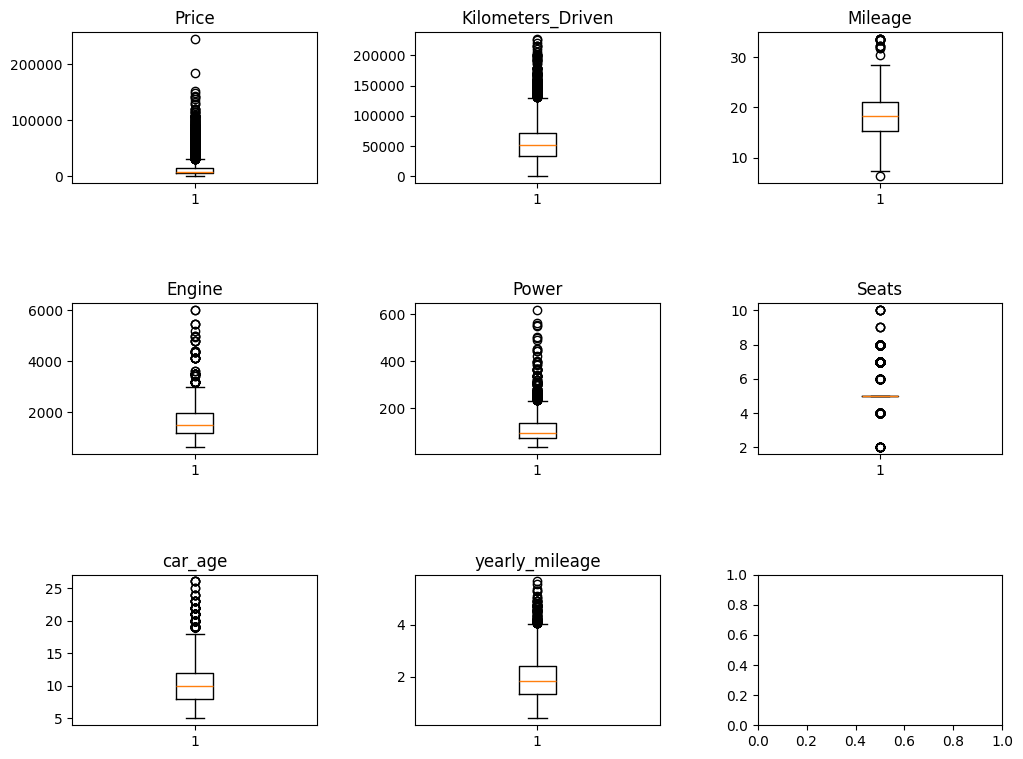

In [45]:
#Ïù¥ÏÉÅÏπò ÌôïÏù∏ÏùÑ ÏúÑÌïú box-plot
fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

fig.subplots_adjust(wspace=0.4, hspace=0.8)

axs[0].boxplot(df['Price'])
axs[0].set_title('Price')

axs[1].boxplot(df['Kilometers_Driven'])
axs[1].set_title('Kilometers_Driven')

axs[2].boxplot(df['Mileage'])
axs[2].set_title('Mileage')

axs[3].boxplot(df['Engine'])
axs[3].set_title('Engine')

axs[4].boxplot(df['Power'])
axs[4].set_title('Power')

axs[5].boxplot(df['Seats'])
axs[5].set_title('Seats')

axs[6].boxplot(df['car_age'])
axs[6].set_title('car_age')

axs[7].boxplot(df['yearly_mileage'])
axs[7].set_title('yearly_mileage')

- Î°úÍ∑∏ Î≥ÄÌôò Ï†Ñ

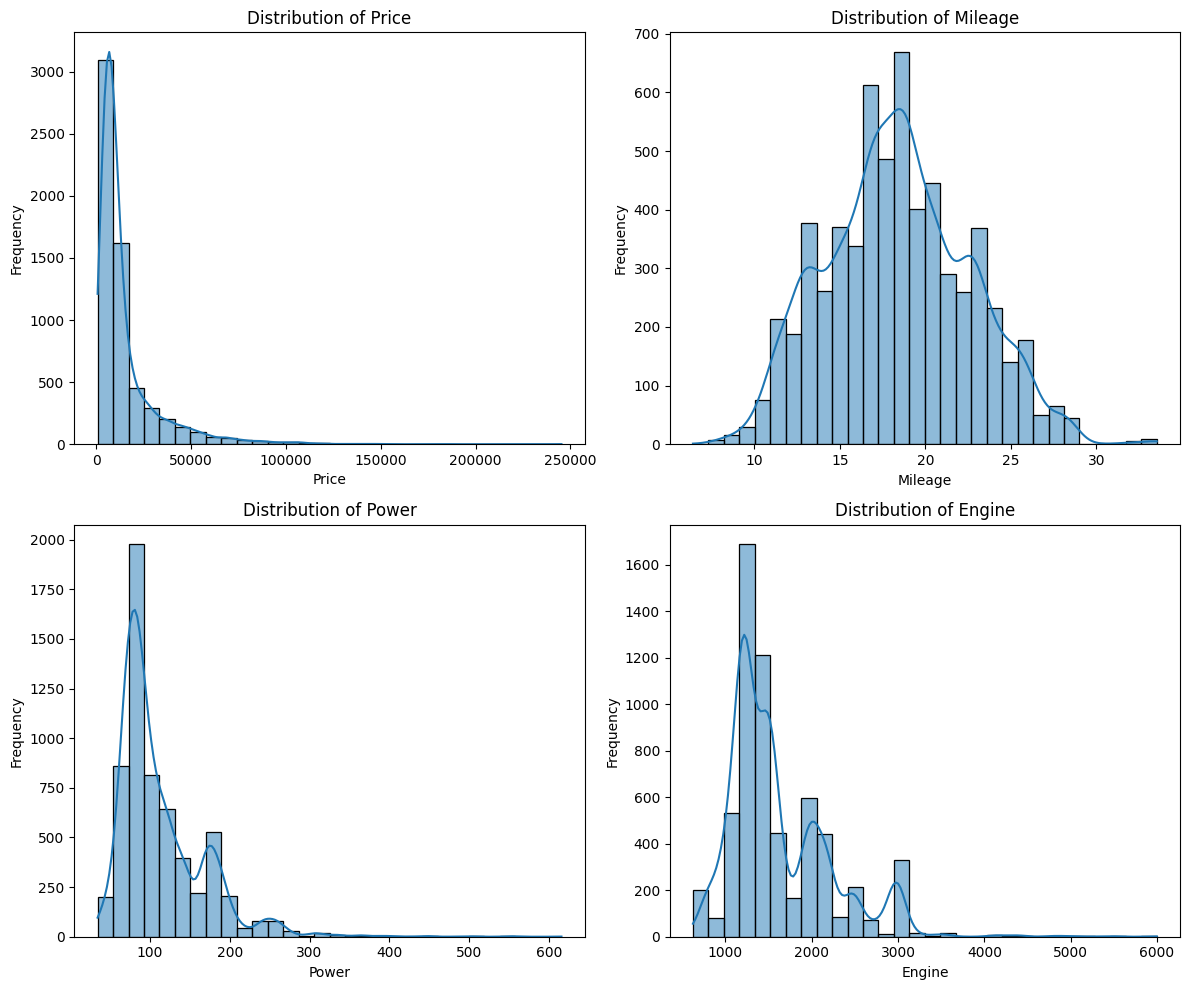

In [46]:
# ÏãúÍ∞ÅÌôîÌï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns = ['Price', 'Mileage', 'Power', 'Engine']

# 2x2 ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Í∞Å Ïª¨ÎüºÏóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)  # 2x2 ÏúÑÏπò ÏÑ§Ï†ï
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()

In [47]:
# Î°úÍ∑∏ Î≥ÄÌôò (log1p ÏÇ¨Ïö©ÌïòÏó¨ 0 Í∞í Ï≤òÎ¶¨)
df['Price'] = np.log1p(df['Price'])
df['Mileage'] = np.log1p(df['Mileage'])
df['Power'] = np.log1p(df['Power'])
df['Engine'] = np.log1p(df['Engine'])
df.head()

Name      Price  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   7.894944  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option   9.860737  2015              41000   
2                      Honda Jazz V   8.839178  2011              46000   
3                 Maruti Ertiga VDI   9.126824  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  10.210815  2013              40670   

  Fuel_Type Transmission Owner_Type   Mileage    Engine     Power  Seats  \
0       CNG       Manual      First  3.317816  6.906755  4.080246    5.0   
1    Diesel       Manual      First  3.028683  7.367077  4.845761    5.0   
2    Petrol       Manual      First  2.954910  7.090077  4.496471    5.0   
3    Diesel       Manual      First  3.080533  7.130099  4.497139    7.0   
4    Diesel    Automatic     Second  2.785011  7.585281  4.954418    5.0   

     Brand  car_age  yearly_mileage Income Level  
0   Maruti       14        1.900000      ÏÉÅ (Î∂ÄÏú†Ìïú)  
1  Hyundai        9        2.185556      ÏÉÅ (Î∂ÄÏú†Ìïú)  
2    Honda       13        1.400000      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
3   Maruti       12        1.730833      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
4     Audi       11        1.381818      Ï§ë (Ï§ëÏÇ∞Ï∏µ)

- Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ

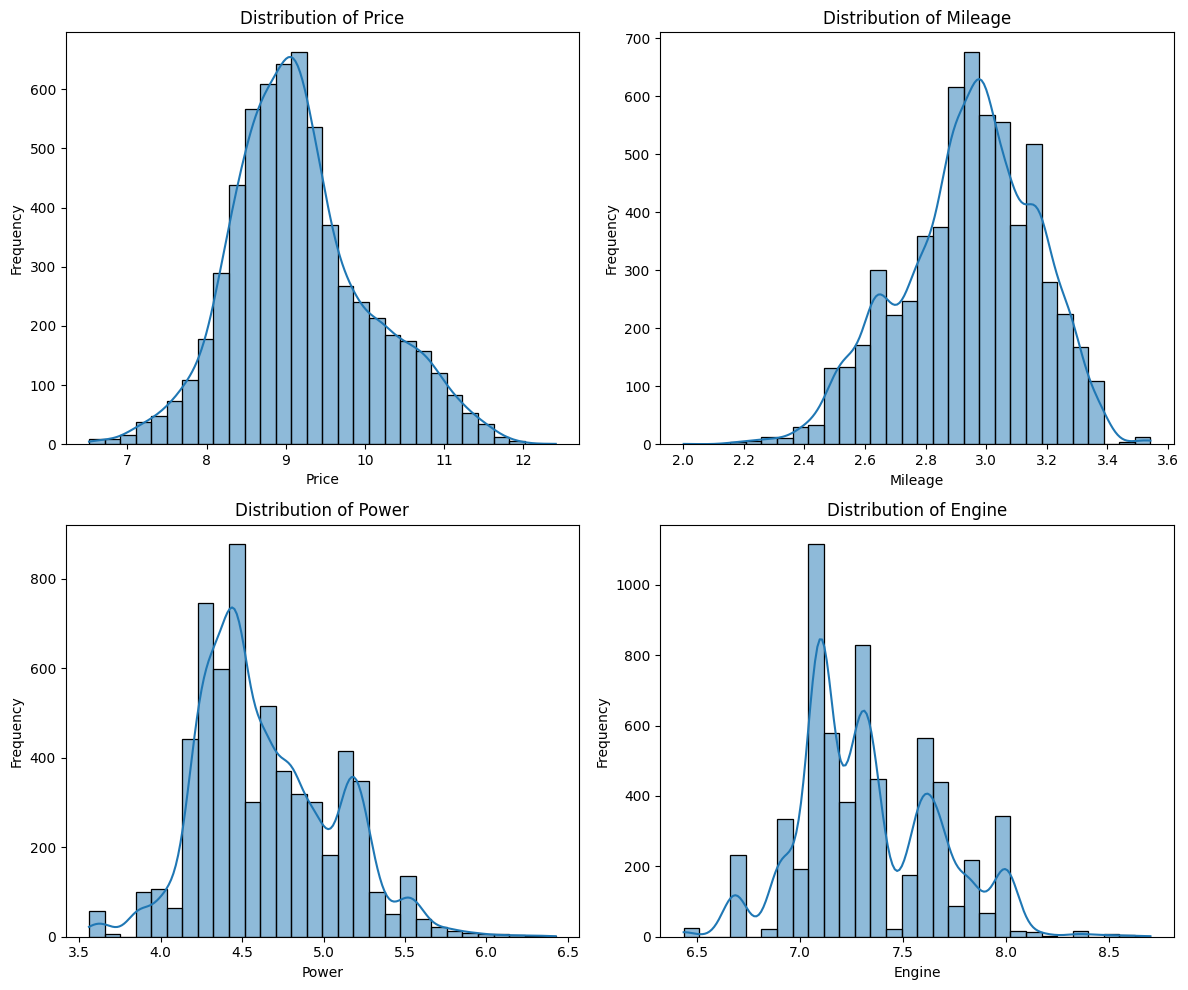

In [48]:
# ÏãúÍ∞ÅÌôîÌï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns = ['Price', 'Mileage', 'Power', 'Engine']

# 2x2 ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Í∞Å Ïª¨ÎüºÏóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)  # 2x2 ÏúÑÏπò ÏÑ§Ï†ï
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()

#ÏõêÌï´Ïù∏ÏΩîÎî©

- nameÏùÄ ÏòÅÌñ•Ïù¥ ÏóÜÏúºÎØÄÎ°ú Ï†úÏô∏Ìï®

In [49]:
df = df.drop(columns=['Name'])
df.head()

Price  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0   7.894944  2010              72000       CNG       Manual      First   
1   9.860737  2015              41000    Diesel       Manual      First   
2   8.839178  2011              46000    Petrol       Manual      First   
3   9.126824  2012              87000    Diesel       Manual      First   
4  10.210815  2013              40670    Diesel    Automatic     Second   

    Mileage    Engine     Power  Seats    Brand  car_age  yearly_mileage  \
0  3.317816  6.906755  4.080246    5.0   Maruti       14        1.900000   
1  3.028683  7.367077  4.845761    5.0  Hyundai        9        2.185556   
2  2.954910  7.090077  4.496471    5.0    Honda       13        1.400000   
3  3.080533  7.130099  4.497139    7.0   Maruti       12        1.730833   
4  2.785011  7.585281  4.954418    5.0     Audi       11        1.381818   

  Income Level  
0      ÏÉÅ (Î∂ÄÏú†Ìïú)  
1      ÏÉÅ (Î∂ÄÏú†Ìïú)  
2      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
3      Ï§ë (Ï§ëÏÇ∞Ï∏µ)  
4      Ï§ë (Ï§ëÏÇ∞Ï∏µ)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6139 entries, 0 to 7235
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              6139 non-null   float64
 1   Year               6139 non-null   int64  
 2   Kilometers_Driven  6139 non-null   int64  
 3   Fuel_Type          6139 non-null   object 
 4   Transmission       6139 non-null   object 
 5   Owner_Type         6139 non-null   object 
 6   Mileage            6139 non-null   float64
 7   Engine             6139 non-null   float64
 8   Power              6139 non-null   float64
 9   Seats              6139 non-null   float64
 10  Brand              6139 non-null   object 
 11  car_age            6139 non-null   int64  
 12  yearly_mileage     6139 non-null   float64
 13  Income Level       6139 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 719.4+ KB


In [51]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Income Level'])

# Í∏∞Ï°¥ Ïà´ÏûêÌòï(float) Ïª¨Îüº Ïú†ÏßÄ & ÎçîÎØ∏ Î≥ÄÏàòÎßå intÎ°ú Î≥ÄÌôò
dummy_columns = df_encoded.select_dtypes(include=['bool']).columns  # ÎçîÎØ∏ Î≥ÄÏàò ÏÑ†ÌÉù
df_encoded[dummy_columns] = df_encoded[dummy_columns].astype(int)

df_encoded.head()

Price  Year  Kilometers_Driven   Mileage    Engine     Power  Seats  \
0   7.894944  2010              72000  3.317816  6.906755  4.080246    5.0   
1   9.860737  2015              41000  3.028683  7.367077  4.845761    5.0   
2   8.839178  2011              46000  2.954910  7.090077  4.496471    5.0   
3   9.126824  2012              87000  3.080533  7.130099  4.497139    7.0   
4  10.210815  2013              40670  2.785011  7.585281  4.954418    5.0   

   car_age  yearly_mileage  Fuel_Type_CNG  ...  Brand_Renault  Brand_Skoda  \
0       14        1.900000              1  ...              0            0   
1        9        2.185556              0  ...              0            0   
2       13        1.400000              0  ...              0            0   
3       12        1.730833              0  ...              0            0   
4       11        1.381818              0  ...              0            0   

   Brand_Smart  Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  \
0            0           0             0                 0            0   
1            0           0             0                 0            0   
2            0           0             0                 0            0   
3            0           0             0                 0            0   
4            0           0             0                 0            0   

   Income Level_ÏÉÅ (Î∂ÄÏú†Ìïú)  Income Level_Ï§ë (Ï§ëÏÇ∞Ï∏µ)  Income Level_Ìïò (Ï†ÄÏÜåÎìù)  
0                     1                     0                     0  
1                     1                     0                     0  
2                     0                     1                     0  
3                     0                     1                     0  
4                     0                     1                     0  

[5 rows x 52 columns]

In [52]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6139 entries, 0 to 7235
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      6139 non-null   float64
 1   Year                       6139 non-null   int64  
 2   Kilometers_Driven          6139 non-null   int64  
 3   Mileage                    6139 non-null   float64
 4   Engine                     6139 non-null   float64
 5   Power                      6139 non-null   float64
 6   Seats                      6139 non-null   float64
 7   car_age                    6139 non-null   int64  
 8   yearly_mileage             6139 non-null   float64
 9   Fuel_Type_CNG              6139 non-null   int64  
 10  Fuel_Type_Diesel           6139 non-null   int64  
 11  Fuel_Type_LPG              6139 non-null   int64  
 12  Fuel_Type_Petrol           6139 non-null   int64  
 13  Transmission_Automatic     6139 non-null   int64  
 1

# Ï†ïÍ∑úÌôî/ÌëúÏ§ÄÌôî

In [53]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# ÎçîÎØ∏ÌôîÎêú Î≥ÄÏàòÎì§ ÏÑ†ÌÉù (0Í≥º 1Îßå Ìè¨Ìï®Îêú Ïª¨Îüº)
dummy_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns[df_encoded.nunique() == 2].tolist()

# ÌëúÏ§ÄÌôî Î∞è Ï†ïÍ∑úÌôî ÎåÄÏÉÅ Î≥ÄÏàò ÏÑ†ÌÉù (ÎçîÎØ∏ÌôîÎêú Î≥ÄÏàò Ï†úÏô∏)
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in dummy_columns and col != "Price"]  # Ï¢ÖÏÜçÎ≥ÄÏàò Ï†úÏô∏

In [60]:
# ÌëúÏ§ÄÌôî Ï†ÅÏö© (Z-Score)
scaler_std = StandardScaler()
z_score_scaled = pd.DataFrame(scaler_std.fit_transform(df_encoded[numeric_columns]), columns=numeric_columns, index=df_encoded.index)
df_standardized = pd.concat([z_score_scaled, df_encoded[dummy_columns], df_encoded["Price"]], axis=1)

# ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÎ¶¨
X_std = df_standardized.drop(columns=['Price'])
y = df_standardized['Price']  # ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö© Í∞ÄÎä•

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
model = LinearRegression()

# ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model.fit(X_train_std, y_train_std)
y_pred_std = model.predict(X_test_std)
rmse_std = mean_squared_error(y_test_std, y_pred_std) ** 0.5
r2_std = r2_score(y_test_std, y_pred_std)
print(f" ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞: RMSE = {rmse_std:.4f}, R¬≤ = {r2_std:.4f}")

 ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞: RMSE = 0.2544, R¬≤ = 0.9215


In [61]:
# Ï†ïÍ∑úÌôî Ï†ÅÏö© (MinMax Scaling)
scaler_minmax = MinMaxScaler()
minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_encoded[numeric_columns]), columns=numeric_columns, index=df_encoded.index)
df_normalized = pd.concat([minmax_scaled, df_encoded[dummy_columns], df_encoded["Price"]], axis=1)

# ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÎ¶¨
X_std = df_standardized.drop(columns=['Price'])
X_norm = df_normalized.drop(columns=['Price'])
y = df_standardized['Price']  # ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö© Í∞ÄÎä•

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
model = LinearRegression()

# Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model.fit(X_train_norm, y_train_norm)
y_pred_norm = model.predict(X_test_norm)
rmse_norm = mean_squared_error(y_test_norm, y_pred_norm) ** 0.5
r2_norm = r2_score(y_test_norm, y_pred_norm)

print(f" Ï†ïÍ∑úÌôî Îç∞Ïù¥ÌÑ∞: RMSE = {rmse_norm:.4f}, R¬≤ = {r2_norm:.4f}")

 Ï†ïÍ∑úÌôî Îç∞Ïù¥ÌÑ∞: RMSE = 0.2544, R¬≤ = 0.9215


In [56]:
# ÌëúÏ§ÄÌôî Ï†ÅÏö© (Z-Score)
scaler_std = StandardScaler()
z_score_scaled = pd.DataFrame(scaler_std.fit_transform(df_encoded[numeric_columns]), columns=numeric_columns, index=df_encoded.index)

# Ï†ïÍ∑úÌôî Ï†ÅÏö© (MinMax Scaling)
scaler_minmax = MinMaxScaler()
minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_encoded[numeric_columns]), columns=numeric_columns, index=df_encoded.index)

# ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ + ÎçîÎØ∏ÌôîÎêú Î≥ÄÏàò + Price Í≤∞Ìï©
df_standardized = pd.concat([z_score_scaled, df_encoded[dummy_columns], df_encoded["Price"]], axis=1)
df_normalized = pd.concat([minmax_scaled, df_encoded[dummy_columns], df_encoded["Price"]], axis=1)

# ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ ÏïûÎ∂ÄÎ∂Ñ ÌôïÏù∏
print("ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ (Z-Score Standardization) ÏòàÏãú:")
print(df_standardized.head())

# Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞ ÏïûÎ∂ÄÎ∂Ñ ÌôïÏù∏
print("\n Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞ (MinMax Normalization) ÏòàÏãú:")
print(df_normalized.head())

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∞®Ïõê ÌôïÏù∏
print(f"\n df_standardized shape: {df_standardized.shape}")
print(f" df_normalized shape: {df_normalized.shape}")


‚úÖ ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ (Z-Score Standardization) ÏòàÏãú:
       Year  Kilometers_Driven   Mileage    Engine     Power     Seats  \
0 -1.067111           0.493725  1.699848 -1.256470 -1.372033 -0.343945   
1  0.472127          -0.466229  0.392974  0.109420  0.486282 -0.343945   
2 -0.759264          -0.311397  0.059521 -0.712508 -0.361631 -0.343945   
3 -0.451416           0.958218  0.627333 -0.593754 -0.360008  2.154846   
4 -0.143569          -0.476448 -0.708420  0.756886  0.750051 -0.343945   

    car_age  yearly_mileage  Fuel_Type_CNG  Fuel_Type_Diesel  ...  \
0  1.067111       -0.055949              1                 0  ...   
1 -0.472127        0.295990              0                 1  ...   
2  0.759264       -0.672184              0                 0  ...   
3  0.451416       -0.264442              0                 1  ...   
4  0.143569       -0.694592              0                 1  ...   

   Brand_Skoda  Brand_Smart  Brand_Tata  Brand_Toyota  Brand_Volkswagen  \
0   

In [57]:
# Í∏∞Î≥∏ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌëúÏ§ÄÌôî vs Ï†ïÍ∑úÌôî ÏÑ±Îä• ÎπÑÍµê

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÎ¶¨
X_std = df_standardized.drop(columns=['Price'])
X_norm = df_normalized.drop(columns=['Price'])
y = df_standardized['Price']  # ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö© Í∞ÄÎä•

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
model = LinearRegression()

# ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model.fit(X_train_std, y_train_std)
y_pred_std = model.predict(X_test_std)
rmse_std = mean_squared_error(y_test_std, y_pred_std) ** 0.5
r2_std = r2_score(y_test_std, y_pred_std)

# Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model.fit(X_train_norm, y_train_norm)
y_pred_norm = model.predict(X_test_norm)
rmse_norm = mean_squared_error(y_test_norm, y_pred_norm) ** 0.5
r2_norm = r2_score(y_test_norm, y_pred_norm)

# Í≤∞Í≥º Ï∂úÎ†•
print(" Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
print(f" ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞: RMSE = {rmse_std:.4f}, R¬≤ = {r2_std:.4f}")
print(f" Ï†ïÍ∑úÌôî Îç∞Ïù¥ÌÑ∞: RMSE = {rmse_norm:.4f}, R¬≤ = {r2_norm:.4f}")

# ÎπÑÍµê ÏöîÏïΩ
better_method = "ÌëúÏ§ÄÌôî" if rmse_std < rmse_norm else "Ï†ïÍ∑úÌôî"
print(f"\n Í≤∞Î°†: Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏóêÏÑúÎäî **{better_method}** Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏù¥ Îçî Ï†ÅÌï©Ìï©ÎãàÎã§.")

üìä Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
‚úÖ ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞: RMSE = 0.2544, R¬≤ = 0.9215
‚úÖ Ï†ïÍ∑úÌôî Îç∞Ïù¥ÌÑ∞: RMSE = 0.2544, R¬≤ = 0.9215

üöÄ Í≤∞Î°†: Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏóêÏÑúÎäî **ÌëúÏ§ÄÌôî** Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏù¥ Îçî Ï†ÅÌï©Ìï©ÎãàÎã§.


#ÌÜµÍ≥ÑÏ†ÅÏú†ÏùòÏÑ± Í≤ÄÏ†ï

- ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

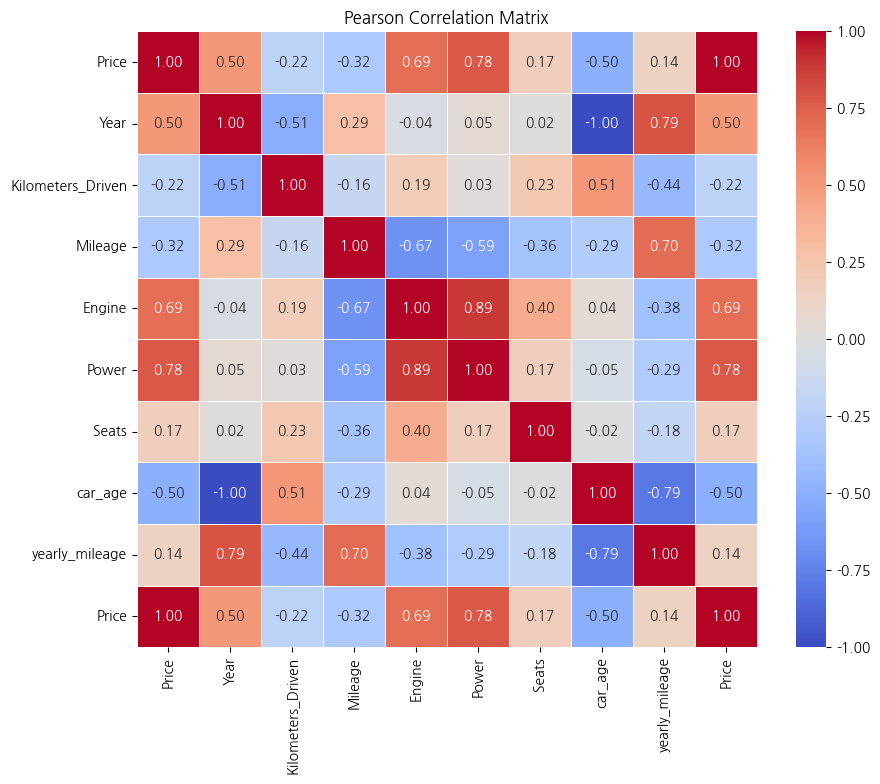

In [ ]:
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# ÏÉÅÍ¥ÄÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df[continuous_columns + ['Price']].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()

priceÎäî power, engineÍ≥º ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ÄÏßê